## Retrieve weather data from past 100 years

### install pandas first

In [1]:
!pip install pandas
import pandas as pd

In [2]:
wdata = pd.read_csv('temp.csv')
wdata.columns = ['Temp', 'Year', 'Month']
print(wdata)

          Temp  Year      Month
0      7.72768  1901    January
1      8.93600  1901   February
2     16.96320  1901      March
3     21.27410  1901      April
4     26.04970  1901        May
...        ...   ...        ...
1387  27.63320  2016     August
1388  26.71790  2016  September
1389  22.39820  2016    October
1390  15.76720  2016   November
1391  12.87630  2016   December

[1392 rows x 3 columns]


### Segregate data in months

In [3]:
import calendar as cal
months = cal.month_name[1:]
print(months)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [4]:
mdata = {}
for month in months:
    mdata[month[0:3].lower()] = wdata[wdata.Month == month].drop('Month',1)
print(mdata['jan'].head(45))

         Temp  Year
0     7.72768  1901
12    9.90868  1902
24    7.69502  1903
36    6.93021  1904
48    6.75049  1905
60    6.99888  1906
72   10.43800  1907
84    9.16938  1908
96    7.03193  1909
108   8.28281  1910
120   8.35633  1911
132   9.34208  1912
144   9.56291  1913
156  10.50310  1914
168   8.32678  1915
180   9.95363  1916
192   9.72695  1917
204   7.58665  1918
216   7.77159  1919
228   8.63298  1920
240   8.85667  1921
252   8.52109  1922
264   8.44368  1923
276   7.90866  1924
288   7.01882  1925
300   9.18545  1926
312   7.01288  1927
324   8.09961  1928
336   7.25885  1929
348   6.49648  1930
360   9.59812  1931
372  10.20490  1932
384   6.96584  1933
396   6.22931  1934
408   6.62090  1935
420   7.20295  1936
432   7.69728  1937
444   7.64421  1938
456   9.17465  1939
468   9.98493  1940
480   8.36705  1941
492   8.14011  1942
504   7.74994  1943
516   8.60892  1944
528   6.76212  1945


C:\Users\Hamza\AppData\Local\Temp\ipykernel_16692\3306502238.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mdata[month[0:3].lower()] = wdata[wdata.Month == month].drop('Month',1)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_16692\3306502238.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mdata[month[0:3].lower()] = wdata[wdata.Month == month].drop('Month',1)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_16692\3306502238.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mdata[month[0:3].lower()] = wdata[wdata.Month == month].drop('Month',1)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_16692\3306502238.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will

In [5]:
!pip install matplotlib
import matplotlib.pyplot as mpl

9.073628570330218


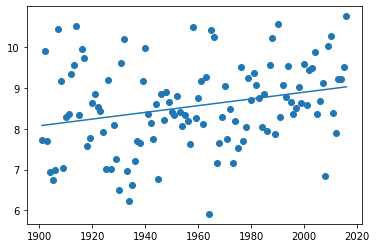

11.511609579825471


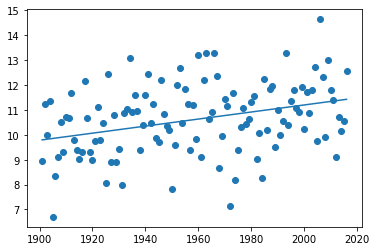

16.848341214008375


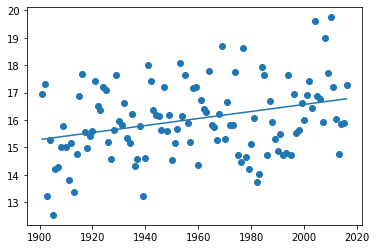

22.396005843232228


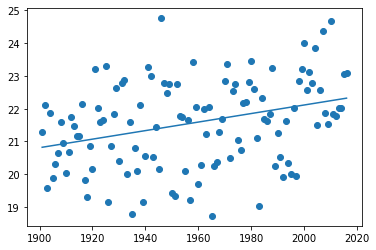

26.58444239418752


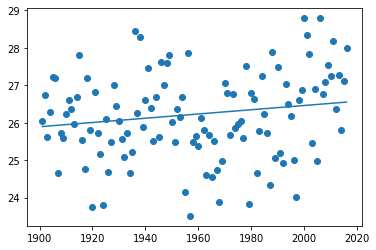

29.086645138968972


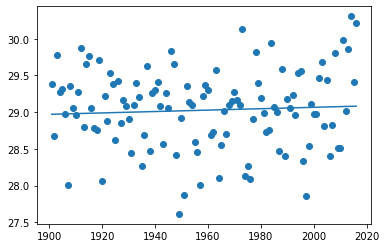

28.81114058355437


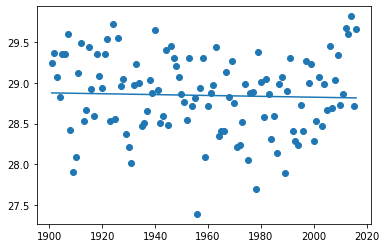

27.95172413793103


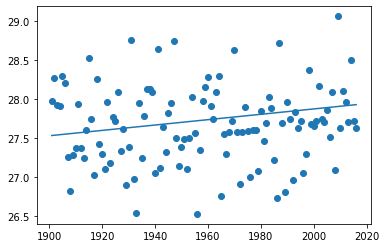

25.64683043093837


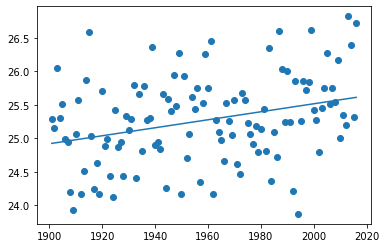

21.383588974743393


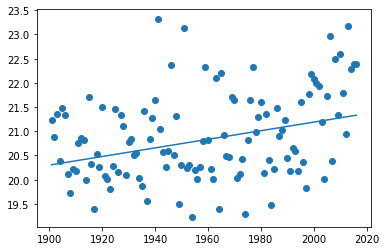

16.016695498404633


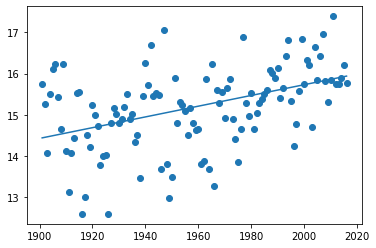

11.059835466881935


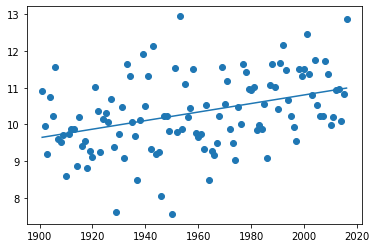

In [14]:
import numpy as np
for month in mdata:
    xcoordinates = np.array(mdata[month].Year)
    ycoordinates = np.array((mdata[month].Temp).round(decimals=0))
    a, b = np.polyfit(xcoordinates, ycoordinates, 1)
    mpl.scatter(mdata[month].Year, mdata[month].Temp)
    mpl.plot(xcoordinates, a*xcoordinates+b)
    print(a*2022+b) #shows predicted temperature as per LOBF
    mpl.show()

### Lets try heatmap

In [10]:
range = np.arange(0, 35, 5)
!pip install seaborn
import seaborn as sb

     ------------------------------------ 292.8/292.8 kB 220.6 kB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 2.8 MB/s eta 0:00:00


[ 8. 10.  8.  7.  7.  7. 10.  9.  7.  8.  8.  9. 10. 11.  8. 10. 10.  8.
  8.  9.  9.  9.  8.  8.  7.  9.  7.  8.  7.  6. 10. 10.  7.  6.  7.  7.
  8.  8.  9. 10.  8.  8.  8.  9.  7.  9.  8.  9.  9.  8.  8.  9.  8.  8.
  8.  8.  8. 10.  8.  9.  9.  8.  9.  6. 10. 10.  7.  8.  8.  9.  8.  8.
  7.  8.  8. 10.  8.  8.  9.  9.  9.  9.  9.  8.  9.  8. 10. 10.  8. 11.
  8.  9.  9. 10.  9.  8.  9.  9.  9. 10.  9.  9.  9. 10.  8.  9.  9.  7.
 10. 10.  8.  8.  9.  9. 10. 11.]


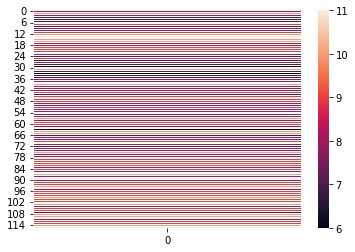

[ 9. 11. 10. 11.  7.  8.  9. 10.  9. 11. 11. 12. 10.  9.  9.  9. 12. 11.
  9.  9. 10. 11. 10. 10.  8. 12.  9. 11.  9.  9.  8. 11. 11. 13. 11. 12.
 11.  9. 10. 12. 12. 10. 11. 10. 10. 12. 11. 10. 10.  8. 10. 12. 13. 10.
 12. 11.  9. 11. 10. 13.  9. 12. 13. 11. 11. 13. 12.  9. 10. 11. 11.  7.
 12.  8.  9. 10. 11. 10. 11. 11. 12.  9. 10.  8. 12. 10. 12. 12. 10. 11.
 10. 11. 13. 10. 11. 12. 11. 11. 12. 10. 12. 11. 12. 13. 10. 15. 12. 10.
 13. 12. 11.  9. 11. 10. 11. 13.]


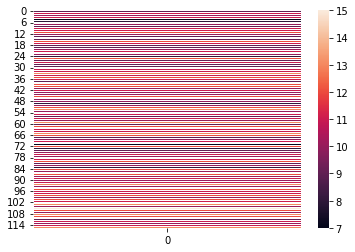

[17. 17. 13. 15. 13. 14. 14. 15. 16. 15. 14. 15. 13. 15. 17. 18. 16. 15.
 15. 16. 17. 17. 16. 17. 17. 15. 15. 16. 18. 16. 16. 17. 15. 15. 16. 14.
 15. 16. 13. 15. 18. 17. 16. 16. 16. 16. 17. 16. 16. 15. 15. 16. 18. 16.
 18. 16. 15. 17. 17. 14. 17. 16. 16. 18. 16. 16. 15. 16. 19. 15. 17. 16.
 16. 18. 15. 14. 19. 15. 14. 15. 16. 14. 14. 18. 18. 15. 17. 16. 15. 15.
 16. 15. 15. 18. 15. 17. 16. 16. 17. 16. 17. 17. 16. 20. 17. 17. 16. 19.
 18. 20. 17. 16. 15. 16. 16. 17.]


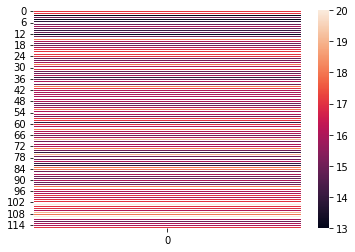

[21. 22. 20. 22. 20. 20. 21. 22. 21. 20. 21. 22. 21. 21. 21. 22. 20. 19.
 21. 20. 23. 22. 22. 22. 23. 19. 21. 22. 23. 20. 23. 23. 20. 22. 19. 21.
 20. 22. 19. 21. 23. 23. 21. 21. 20. 25. 23. 22. 23. 19. 19. 23. 22. 22.
 20. 22. 19. 23. 22. 20. 20. 22. 21. 22. 19. 20. 20. 21. 22. 23. 23. 20.
 23. 23. 21. 21. 22. 22. 23. 23. 23. 21. 19. 22. 22. 22. 22. 23. 20. 21.
 21. 20. 22. 20. 20. 22. 20. 23. 23. 24. 23. 23. 23. 24. 22. 23. 24. 22.
 22. 25. 22. 22. 22. 22. 23. 23.]


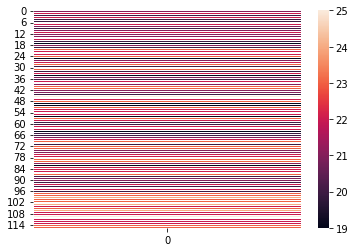

[26. 27. 26. 26. 27. 27. 25. 26. 26. 26. 27. 26. 26. 27. 28. 26. 25. 27.
 26. 24. 27. 26. 25. 24. 26. 25. 25. 27. 26. 26. 26. 25. 26. 25. 25. 28.
 26. 28. 26. 27. 27. 26. 26. 27. 26. 28. 27. 28. 28. 26. 25. 26. 26. 27.
 24. 28. 24. 25. 26. 25. 26. 26. 25. 26. 25. 26. 25. 24. 25. 27. 27. 26.
 27. 26. 26. 26. 26. 28. 24. 27. 27. 25. 26. 27. 26. 26. 24. 28. 25. 27.
 25. 25. 27. 27. 26. 25. 24. 27. 27. 29. 28. 28. 25. 27. 25. 29. 27. 27.
 28. 27. 28. 26. 27. 26. 27. 28.]


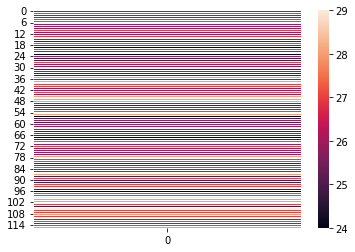

[29. 29. 30. 29. 29. 29. 28. 29. 29. 29. 29. 30. 29. 30. 30. 29. 29. 29.
 30. 28. 29. 29. 30. 29. 29. 29. 29. 29. 29. 29. 28. 29. 29. 29. 28. 29.
 30. 28. 29. 29. 29. 29. 29. 29. 29. 30. 30. 28. 28. 29. 28. 29. 29. 29.
 29. 28. 28. 29. 29. 29. 29. 29. 30. 28. 29. 29. 29. 29. 29. 29. 29. 29.
 30. 28. 28. 28. 29. 30. 29. 29. 29. 29. 29. 30. 29. 29. 28. 30. 28. 29.
 29. 29. 29. 30. 30. 28. 28. 29. 29. 29. 29. 29. 30. 29. 29. 28. 29. 30.
 29. 29. 30. 29. 30. 30. 29. 30.]


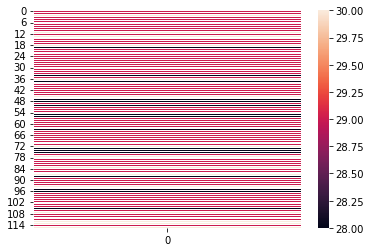

[29. 29. 29. 29. 29. 29. 30. 28. 28. 28. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 30. 29. 30. 29. 30. 29. 29. 28. 28. 28. 29. 29. 29. 28. 29.
 29. 29. 29. 30. 29. 29. 29. 29. 28. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 27. 29. 29. 28. 29. 29. 29. 29. 28. 28. 28. 29. 29. 29. 29. 28. 28.
 29. 29. 28. 29. 29. 28. 29. 29. 29. 29. 29. 28. 29. 28. 29. 29. 28. 29.
 29. 28. 28. 28. 29. 28. 29. 29. 29. 28. 29. 29. 28. 29. 29. 29. 29. 29.
 29. 29. 29. 30. 30. 30. 29. 30.]


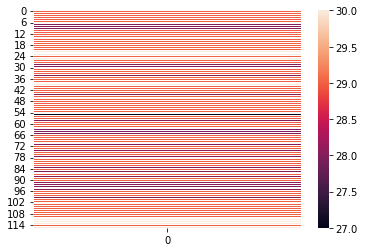

[28. 28. 28. 28. 28. 28. 27. 27. 27. 27. 28. 27. 27. 28. 29. 28. 27. 28.
 27. 27. 27. 28. 27. 28. 28. 28. 27. 28. 27. 27. 29. 27. 27. 28. 27. 28.
 28. 28. 28. 27. 29. 27. 28. 27. 28. 28. 29. 28. 27. 27. 27. 27. 28. 28.
 28. 27. 27. 28. 28. 28. 28. 28. 28. 28. 27. 28. 27. 28. 28. 29. 28. 27.
 28. 28. 28. 27. 28. 28. 27. 28. 27. 28. 28. 28. 27. 27. 29. 28. 27. 28.
 28. 27. 28. 28. 28. 27. 27. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 27.
 29. 28. 28. 28. 28. 29. 28. 28.]


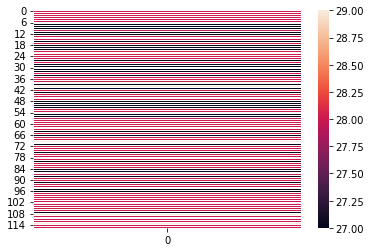

[25. 25. 26. 25. 26. 25. 25. 24. 24. 25. 26. 24. 25. 26. 27. 25. 24. 25.
 24. 26. 25. 25. 24. 24. 25. 25. 25. 24. 25. 25. 25. 26. 24. 26. 25. 26.
 25. 25. 26. 25. 25. 25. 26. 24. 26. 25. 26. 25. 26. 24. 26. 25. 25. 26.
 25. 26. 24. 26. 26. 26. 26. 24. 25. 25. 25. 25. 26. 25. 25. 26. 25. 24.
 26. 26. 25. 25. 25. 25. 25. 25. 25. 25. 26. 24. 25. 25. 27. 26. 25. 26.
 25. 24. 26. 24. 25. 26. 26. 26. 27. 25. 25. 25. 25. 26. 26. 26. 26. 26.
 26. 25. 25. 25. 27. 26. 25. 27.]


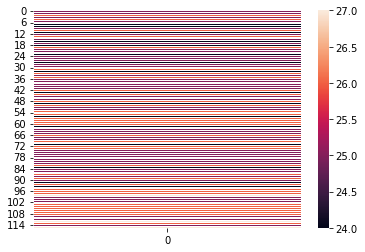

[21. 21. 21. 20. 21. 21. 20. 20. 20. 20. 21. 21. 21. 20. 22. 20. 19. 21.
 20. 21. 20. 20. 20. 20. 21. 20. 21. 21. 20. 21. 21. 21. 21. 20. 20. 21.
 20. 21. 21. 22. 23. 21. 21. 20. 21. 22. 20. 21. 19. 20. 23. 20. 20. 19.
 20. 20. 20. 21. 22. 21. 20. 20. 22. 19. 22. 21. 20. 20. 22. 22. 20. 20.
 20. 19. 21. 22. 22. 21. 21. 22. 20. 21. 20. 19. 20. 21. 21. 21. 21. 20.
 20. 21. 21. 20. 22. 20. 20. 22. 22. 22. 22. 22. 21. 20. 22. 23. 20. 22.
 21. 23. 22. 21. 23. 22. 22. 22.]


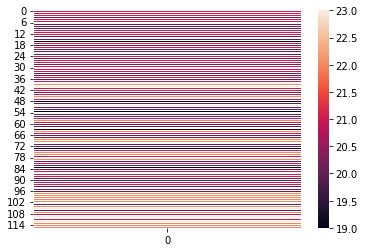

[16. 15. 14. 15. 16. 16. 15. 15. 16. 14. 13. 14. 14. 16. 16. 13. 13. 15.
 14. 15. 15. 15. 14. 14. 14. 13. 15. 15. 15. 15. 15. 15. 16. 15. 15. 14.
 15. 13. 15. 16. 16. 17. 15. 16. 15. 14. 17. 14. 13. 13. 16. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 14. 14. 16. 14. 16. 13. 16. 15. 16. 15. 16. 16.
 15. 14. 14. 15. 17. 15. 15. 16. 15. 15. 15. 15. 16. 16. 16. 16. 16. 16.
 15. 16. 16. 17. 15. 14. 15. 16. 17. 16. 16. 16. 15. 17. 16. 16. 17. 16.
 15. 16. 17. 16. 16. 16. 16. 16.]


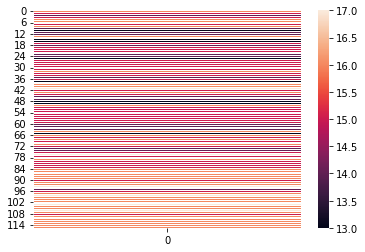

[11. 10.  9. 11. 10. 12. 10. 10. 10.  9. 10. 10. 10.  9. 10.  9. 10.  9.
  9.  9. 11. 10.  9. 10. 10. 10. 11.  9.  8. 10. 10.  9. 12. 11. 10. 10.
  8. 10. 12. 11. 11.  9. 12.  9.  9.  8. 10. 10. 10.  8. 12. 10. 13. 10.
 11. 10. 10. 12. 10. 10. 10.  9. 11.  8.  9.  9. 10. 10. 12. 11. 11. 10.
  9.  9. 10. 10. 12. 11. 11. 11. 11. 10. 10. 10. 11.  9. 11. 12. 11. 10.
 12. 12. 11. 11. 10. 10. 10. 12. 11. 12. 12. 11. 11. 12. 11. 10. 10. 12.
 11. 10. 10. 11. 11. 10. 11. 13.]


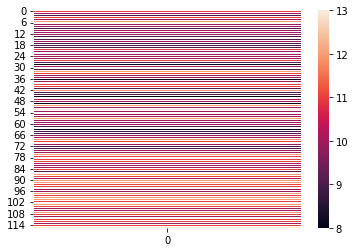

In [21]:
for month in mdata:
    temperatures = np.array((mdata[month].Temp).round())
    print(temperatures)
    ax = sb.heatmap(temperatures, linewidth=0.5)
    mpl.show() ##fix this